LGMVIP-DataScience Internship - January 2022

Beginner Level Task 2 - Stock Market Prediction And Forecasting Using Stacked LSTM

Author - Shreya Balaraman

Importing Libraries 

In [101]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.layers import Dense
from sklearn.metrics import mean_squared_error
%matplotlib inline

Loading Dataset

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

Summerizing Dataset

In [4]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [65]:
data.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [7]:
data.shape

(2035, 8)

In [8]:
df=data.reset_index()['Close']
df

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

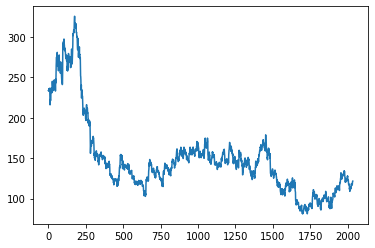

In [9]:
plt.plot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17286faf90>,
      dtype=object)

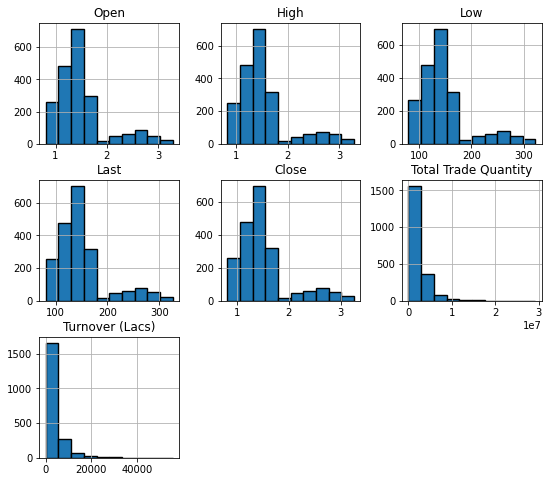

In [79]:
data.hist(edgecolor='black',linewidth=1.4,figsize=(9,8))

LSTM are sensitive to the scale of the data, so we apply MinMax Scaler to transform our values between 0 and 1

In [11]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [12]:
print(df)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


Splitting dataset into train and test 

In [70]:
training_size=int(len(df)*0.75)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [71]:
training_size,test_size

(1526, 509)

In [72]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.18831699],
       [0.18811275],
       [0.17034314]])

In [115]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [113]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [114]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

Building Stacked LSTM Model

In [76]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 64, verbose = 1)

Epoch 1/10
23/23 [==============================] - 18s 444ms/step - loss: 0.0277 - val_loss: 0.0071
Epoch 2/10
23/23 [==============================] - 9s 388ms/step - loss: 0.0033 - val_loss: 0.0013
Epoch 3/10
23/23 [==============================] - 9s 390ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 4/10
23/23 [==============================] - 9s 391ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 5/10
23/23 [==============================] - 9s 397ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/10
23/23 [==============================] - 9s 391ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 7/10
23/23 [==============================] - 9s 398ms/step - loss: 0.0012 - val_loss: 9.4867e-04
Epoch 8/10
23/23 [==============================] - 9s 396ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/10
23/23 [==============================] - 9s 393ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/10
23/23 [==============================] - 9s 393ms/step - loss: 0.0011 - val_loss: 8

Plotting

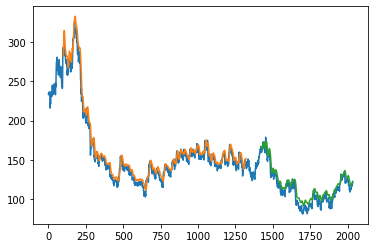

In [78]:
look_back = 100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
testPredictPlot = np.empty_like(df)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Prediction

In [116]:
len(test_data)

509

In [117]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 168)

In [118]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [119]:
temp_input

[0.06801470588235292,
 0.0667892156862745,
 0.07414215686274506,
 0.0716911764705882,
 0.08639705882352938,
 0.08312908496732024,
 0.06311274509803921,
 0.06290849673202609,
 0.05167483660130712,
 0.031862745098039214,
 0.04003267973856206,
 0.03860294117647056,
 0.041053921568627416,
 0.033905228758169925,
 0.031249999999999944,
 0.026348039215686292,
 0.05861928104575159,
 0.06311274509803921,
 0.06209150326797386,
 0.055351307189542454,
 0.08455882352941174,
 0.05514705882352938,
 0.06045751633986923,
 0.055759803921568596,
 0.04391339869281047,
 0.029207516339869233,
 0.028186274509803877,
 0.04718137254901961,
 0.06045751633986923,
 0.05861928104575159,
 0.06168300653594766,
 0.06699346405228751,
 0.07087418300653592,
 0.07557189542483661,
 0.07700163398692805,
 0.10375816993464049,
 0.10314542483660127,
 0.10334967320261434,
 0.10089869281045749,
 0.1043709150326797,
 0.0980392156862745,
 0.09722222222222221,
 0.09783496732026142,
 0.09579248366013071,
 0.09109477124183002,
 0.09

In [120]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [121]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [122]:
math.sqrt(mean_squared_error(y_train,train_predict))

163.7469423791941

In [123]:
math.sqrt(mean_squared_error(y_test,test_predict))

108.57568185414891

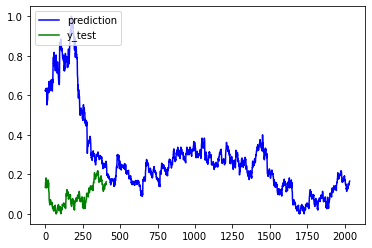

In [124]:
plt.plot(df,color='blue', label='prediction')
plt.plot(y_test,color='green', label='y_test')
plt.legend(loc='upper left')
plt.show()